# Analyzing a dataset and performing a classification analysis

## Import our libraries

In [261]:
#Import standard modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display
import random
%matplotlib inline

In [262]:
#Import modules specific to the machine learning aspect of this analysis
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

#Import classification algorithm modules
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation
from sklearn.mixture import GaussianMixture

In [263]:
#Import scoring modules
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, average_precision_score

I will be running classification algorithms on the following dataset of wine, to create a model that can classify a wine as a "good" wine or a "poor" wine, defined by having a quality above 7 or below 7, respectively.

We will consider the index of the dataset as the wine ids

## Import data and visualize

In [264]:
#Import and read our data
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [265]:
df.shape

(1599, 12)

In [266]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [267]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [268]:
df.describe(exclude = None)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Now, I will add our dependent variable "good", which tells us whether or not a wine is above or equal to the quality of 7 (good) or below the quality of 7 (bad)

In [269]:
df['good'] = np.where(df.quality >= 7, 1,0)
df.head(n=10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0


In [270]:
df.drop('quality', inplace = True, axis = 1)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


## Explore data

In [271]:
df_cat = df.copy()
df_cat.describe(exclude = None)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


Lets pick a few features to analyze, and see how they distribute among the "good" wines

I am going to pick, fixed acidity, residual sugar, pH, and alcohol as the features that I want to explore

In [272]:
df_cat = df_cat[['fixed acidity','residual sugar','pH','alcohol','good']]
df_cat['fixed acidity'] = pd.qcut(df_cat['fixed acidity'], q = [0,.25,.5,.75,1], labels = ['very_low_fa','low_fa','mid_fa','high_fa'])
df_cat['residual sugar'] = pd.qcut(df_cat['residual sugar'], q = [0,.25,.5,.75,1], labels = ['very_low_rs','low_rs','mid_rs','high_rs'])
df_cat['pH'] = pd.qcut(df_cat['pH'], q = [0,.25,.5,.75,1], labels = ['very_low_pH','low_pH','mid_pH','high_pH'])
df_cat['alcohol'] = pd.qcut(df_cat['alcohol'], q = [0,.25,.5,.75,1], labels = ['very_low_al','low_al','mid_al','high_al'])
df_cat.head(n=10)

,fixed acidity,residual sugar,pH,alcohol,good
0,low_fa,very_low_rs,high_pH,very_low_al,0
1,low_fa,mid_rs,very_low_pH,low_al,0
2,low_fa,mid_rs,low_pH,low_al,0
3,high_fa,very_low_rs,very_low_pH,low_al,0
4,low_fa,very_low_rs,high_pH,very_low_al,0
5,low_fa,very_low_rs,high_pH,very_low_al,0
6,low_fa,very_low_rs,low_pH,very_low_al,0
7,low_fa,very_low_rs,mid_pH,low_al,1
8,low_fa,low_rs,mid_pH,very_low_al,1
9,low_fa,high_rs,mid_pH,mid_al,0


In [273]:
df_good = df_cat.loc[df_cat['good']==1]
df_good.head()

,fixed acidity,residual sugar,pH,alcohol,good
7,low_fa,very_low_rs,mid_pH,low_al,1
8,low_fa,low_rs,mid_pH,very_low_al,1
16,mid_fa,very_low_rs,low_pH,mid_al,1
37,mid_fa,low_rs,low_pH,low_al,1
62,low_fa,very_low_rs,mid_pH,very_low_al,1


In [274]:
def viz_fts(features):
    for ft in features:
        fig, ax = plt.subplots()
        vc = df_good[ft].value_counts()
        vc_labels = vc.index
        vc_vals = vc.values
        explode = (0.1, 0, 0, 0)
        plt.title(ft)
        ax.pie(vc_vals, labels = vc_labels, explode = explode, autopct = '%1.1f%%', shadow = True, startangle = 90)
        ax.axis('equal')
    plt.show()

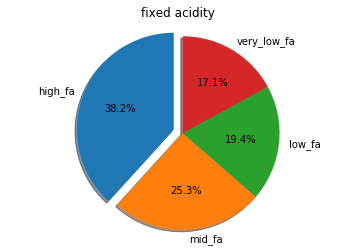

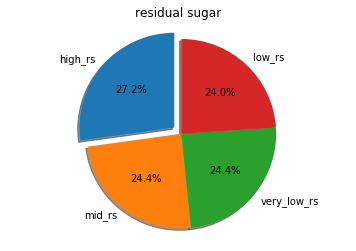

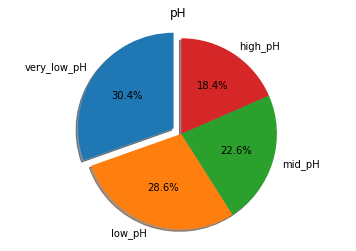

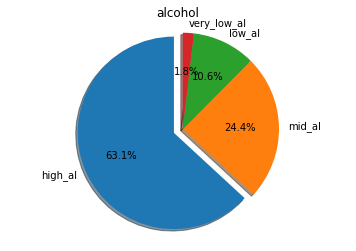

In [275]:
viz_fts(df_good.columns[:-1])

With this analysis, we get an idea about which attributes of the wine will most likely classify it as a good wine

It seems as though most wines with a high content of alcohol (above 11% )are classified as a good quality wine ;)

Now, lets go back to our original dataset, and run some classification algorithms to build a model that can predict, based on these features, whether or not a wine will be of a "good" or "bad" quality

## Classification

In [276]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


We will perform feature scaling on our data, to scale our values in each columns between the values of 0 and 1

This is done so that when we train our model, it wont assign a greater importance to one feature, over another, when that importance may not exist

This may seem confusing at first, but imagine you had two features (two columns), one was age, and the other was salary

If you did not feature scale and trained your model, it would think that the salary feature was of more importance in its decision making process than age (because salary is typically of a greater magnitude than age ex. $100,000 vs 23)

The difference in magnitude between the features could cause the model to almost completely disregard the age feature

So we scale the values in each column (in this case between 0 and 1) to have our features analyzed on the same "scale"

In [277]:
scaler = MinMaxScaler()
df_tf = pd.DataFrame(scaler.fit_transform(df.astype('float')),columns = df.columns)
df_tf.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.0
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.0
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.0
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.0
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.0


In [278]:
#just to make sure everything was scaled correctly between 0 and 1
df_tf.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.329171,0.279329,0.270976,0.112247,0.125988,0.209506,0.142996,0.490211,0.449695,0.196496,0.311228,0.135710
std,0.154079,0.122644,0.194801,0.096570,0.078573,0.147326,0.116238,0.138571,0.121564,0.101501,0.163949,0.342587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221239,0.184932,0.090000,0.068493,0.096828,0.084507,0.056537,0.406021,0.370079,0.131737,0.169231,0.000000
50%,0.292035,0.273973,0.260000,0.089041,0.111853,0.183099,0.113074,0.490455,0.448819,0.173653,0.276923,0.000000
75%,0.407080,0.356164,0.420000,0.116438,0.130217,0.281690,0.197880,0.570117,0.519685,0.239521,0.415385,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [279]:
df_tf.good.mean()

0.1357098186366479

From the calculation of the dependent variables mean, we can see that the dataset is highly imbalanced

The amount of negatives outweigh the positives

In [280]:
X = df_tf.drop('good',axis = 1)
y = df_tf['good']
display(X.head())
display(y.head(n=10))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    1.0
8    1.0
9    0.0
Name: good, dtype: float64

In [281]:
#Lets set up a list of our model features (this will be useful later) and split our data into train/test/val sets
#We will set up a 50%/25%/25% train/test/val split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.50, random_state = 1)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.50, random_state = 1)

In [282]:
clfs = [LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier(n_estimators = 100, oob_score = True, random_state = 1), GradientBoostingClassifier(), AdaBoostClassifier()]
names_clfs = ['Logistic Regression','K-Neighbors','Random Forest','Gradient Boosting','Adaptive Boosting']

In [283]:
def get_fits(clfs):
    fits = []
    for clf in clfs:
        random.seed(1)
        clf.fit(X_train, y_train)
        fits.append(clf)
    return fits

In [284]:
fits = get_fits(clfs)

In [285]:
def get_scores(fits,names_clf_methods,x_data,y_data):
    au_rocs = []
    pr_aucs = []
    for f in fits:
        # calculate AUROC, append to list of AUROCs
        y_pred_prob = f.predict_proba(x_data)
        au_roc = roc_auc_score(y_data, y_pred_prob[:,1])
        au_rocs.append(au_roc)
        #calculate average precision, append to pr_aucs
        pr_auc = average_precision_score(y_data,y_pred_prob[:,1])
        pr_aucs.append(pr_auc)
    # Visualize summary information in a dataframe
    index = names_clf_methods
    scores = pd.DataFrame({'au-roc':au_rocs,'Avg Precision':pr_aucs}, index = index)
    scores = scores.astype(float).round(4).sort_values(by = 'Avg Precision', ascending = False)
    return scores

In [286]:
scores = get_scores(fits,names_clfs,X_val,y_val)
scores

,Avg Precision,au-roc
Random Forest,0.6617,0.9164
Gradient Boosting,0.5644,0.9113
Adaptive Boosting,0.5229,0.8939
Logistic Regression,0.4141,0.8638
K-Neighbors,0.3811,0.8567


Since our dataset is highly imbalanced (as seen by calculating the mean of the dependent variable earlier) it is especially helpful to evaluate using ROC AUC and Average Precision

Average Precision is not exactly the same as PR AUC (area under the precision recall curve) but it is usally almost equivalent, and is less optimistic which I prefer as I believe it is a more accurate and conservative approach

Furthermore, when using an imbalanced dataset (one where the negatives significantly outweigh the positives i.e. more 0s than 1s in the "good" column), and comparing models, it is said to be better to evaluate using PR AUC as it does not take into consideration True Negatives, and therefore will exhibit "more pronounced" differences between the algorithms

If you're interested in following up on this in more detail, here is a helpful resource:

http://www.chioka.in/differences-between-roc-auc-and-pr-auc/

In any case, I like to evaluate using both, and in this case the Random Forest classifier performs better than the other classifiers in both metrics

Lets go on to tune our classifier further

In [287]:
param_grid = { 
    'n_estimators': [150,200, 500],
}

CV_rfc = GridSearchCV(estimator = RandomForestClassifier(random_state = 1), param_grid = param_grid, cv = 5, scoring = 'average_precision')
CV_rfc.fit(X_val, y_val)
print(CV_rfc.best_params_)

{'n_estimators': 150}


In [288]:
rf_v_fit = get_fits([RandomForestClassifier(**CV_rfc.best_params_, random_state = 1)])

In [289]:
rf_v_score = get_scores(rf_v_fit, ['Random Forest'], X_val, y_val)
rf_v_score

,Avg Precision,au-roc
Random Forest,0.6699,0.9172


In [290]:
rf_t_score = get_scores(rf_v_fit, ['Random Forest'], X_test, y_test)
rf_t_score

,Avg Precision,au-roc
Random Forest,0.7064,0.8966


Lets throw some cluster analysis into the mix to see if it improves our model performance

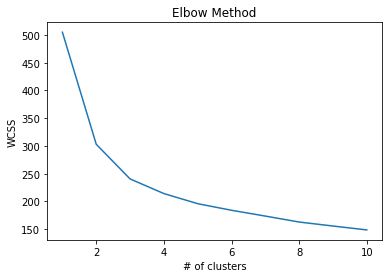

In [291]:
#using elbow method to find optimal number of clusters
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 1)
    kmeans.fit(df_tf)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('# of clusters')
plt.ylabel('WCSS')
plt.show()

In [292]:
#optimal # of clusters looks to be around 3, now lets apply k-means
def doKMeans(X, i):
    kmeans = KMeans(n_clusters = i, random_state = 1)
    kmeans_fit = kmeans.fit(X)
    y_kmeans = kmeans_fit.predict(X)
    cent = kmeans.cluster_centers_
    return(y_kmeans, cent)

In [293]:
y_kmeans, cent = doKMeans(X, 3)

In [294]:
kmeans_df = pd.DataFrame(y_kmeans)
clust_df = df_tf.copy()
clust_df['kmeans'] = kmeans_df
cols = list(clust_df.columns)
clust_df = clust_df[cols[:-2] + cols[-1:] + cols[-2:-1]]

In [295]:
clust_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,kmeans,good
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0,0.0
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0,0.0
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0,0.0
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,2,0.0
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0,0.0


In [296]:
X1 = df_tf.drop('good', axis = 1)
y1 = df_tf['good']
display(X1.head(n=10))
display(y1.head(n=10))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
5,0.247788,0.369863,0.00,0.061644,0.105175,0.169014,0.120141,0.567548,0.606299,0.137725,0.153846
6,0.292035,0.328767,0.06,0.047945,0.095159,0.197183,0.187279,0.464758,0.440945,0.077844,0.153846
7,0.238938,0.363014,0.00,0.020548,0.088481,0.197183,0.053004,0.332599,0.511811,0.083832,0.246154
8,0.283186,0.315068,0.02,0.075342,0.101836,0.112676,0.042403,0.494126,0.488189,0.143713,0.169231
9,0.256637,0.260274,0.36,0.356164,0.098497,0.225352,0.339223,0.567548,0.480315,0.281437,0.323077


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    1.0
8    1.0
9    0.0
Name: good, dtype: float64

In [297]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1,test_size = 0.50, random_state = 1)
X_test1, X_val1, y_test1, y_val1 = train_test_split(X_test1, y_test1, test_size = 0.50, random_state = 1)

In [298]:
clfs1 = [LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier(n_estimators = 100, oob_score = True, random_state = 1), GradientBoostingClassifier(), AdaBoostClassifier()]
names_clfs1 = ['Logistic Regression','K-Neighbors','Random Forest','Gradient Boosting','Adaptive Boosting']

In [299]:
def get_fits1(clfs1):
    fits1 = []
    for clf1 in clfs1:
        random.seed(1)
        clf1.fit(X_train1, y_train1)
        fits1.append(clf1)
    return fits1

In [300]:
fits1 = get_fits1(clfs1)

In [301]:
def get_scores1(fits1,names_clf_methods1,x_data1,y_data1):
    au_rocs1 = []
    pr_aucs1 = []
    for f1 in fits1:
        # calculate AUROC, append to list of AUROCs
        y_pred_prob1 = f1.predict_proba(x_data1)
        au_roc1 = roc_auc_score(y_data1, y_pred_prob1[:,1])
        au_rocs1.append(au_roc1)
        #calculate average precision, append to pr_aucs
        pr_auc1 = average_precision_score(y_data1,y_pred_prob1[:,1])
        pr_aucs1.append(pr_auc1)
    # Visualize summary information in a dataframe
    index = names_clf_methods1
    scores1 = pd.DataFrame({'au-roc':au_rocs1,'Avg Precision':pr_aucs1}, index = index)
    scores1 = scores1.astype(float).round(4).sort_values(by = 'Avg Precision', ascending = False)
    return scores1

In [302]:
scores1 = get_scores1(fits1,names_clfs1,X_val1,y_val1)
scores1

,Avg Precision,au-roc
Random Forest,0.6617,0.9164
Gradient Boosting,0.5691,0.9122
Adaptive Boosting,0.5229,0.8939
Logistic Regression,0.4141,0.8638
K-Neighbors,0.3811,0.8567


In [303]:
param_grid1 = { 
    'n_estimators': [150,200, 500],
}

CV_rfc1 = GridSearchCV(estimator = RandomForestClassifier(random_state = 1), param_grid = param_grid1, cv = 5, scoring = 'average_precision')
CV_rfc1.fit(X_val1, y_val1)
print(CV_rfc1.best_params_)

{'n_estimators': 150}


In [304]:
rf_v_fit1 = get_fits1([RandomForestClassifier(**CV_rfc1.best_params_, random_state = 1)])

In [305]:
rf_v_score1 = get_scores1(rf_v_fit1, ['Random Forest'], X_val1, y_val1)
rf_v_score1

,Avg Precision,au-roc
Random Forest,0.6699,0.9172


In [306]:
rf_t_score1 = get_scores1(rf_v_fit1, ['Random Forest'], X_test1, y_test1)
rf_t_score1

,Avg Precision,au-roc
Random Forest,0.7064,0.8966


Looks like clustering didnt help at all. I'll be looking into why this is the case, but either way it was good practice.